In [1]:
from preproc import integration_source_target
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
mimic_path = "/Users/DAHS/Desktop/MIMICIV2.2_PREPROC/preprocessing/MIMICIV-CIRC(12h).csv.gz"
eicu_path = "/Users/DAHS/Desktop/eICU2.0_PREPROC/eICU-CIRC(12h).csv.gz"

mimic, eicu = integration_source_target(mimic_path, eicu_path)

c:\Users\DAHS\Desktop\CIRC_SCL_update\Data preproc\preproc.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mimic['Temperature'].loc[idx] = 0
c:\Users\DAHS\Desktop\CIRC_SCL_update\Data preproc\preproc.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mimic['Temperature_fillna'].loc[idx] = 1


In [3]:
vital_lab = ['HR','MAP','Temperature','Respiratory Rate','SVO2', 'FIO2 (%)', 'PaO2', 'O2 Sat (%)',
             'EtCO2', 'PEEP', 'PaCO2', 'CO2', 'AST','ALT', 'Creatinine', 'Total Bilirubin', 'Tropinin-T', 'Lactate',
             'CRP']
fluids = ['Fluids(ml)']
target = ['Annotation','Shock_next_12h']
procedure = ['CXR', 'Ventilator', 'Mechanical_circ_support', 'MRI']
diagnosis = ['Adv__Valvular_HD', 'hypovolemia_internal', 'hypovolemia_external', 'Acute_Myocardial_Infarction', 'suspected_infection', 'spinal_cord_injury', 'Myocarditis']

In [4]:
import gc
gc.collect()

0

In [5]:
vital = ['HR','ABPd', 'ABPs', 'Temperature','Respiratory Rate','SVO2', 'FIO2 (%)', 'PaO2', 'O2 Sat (%)', 'EtCO2']
lab = ['EtCO2', 'PEEP', 'PaCO2', 'CO2', 'AST','ALT', 'Creatinine', 'Total Bilirubin', 'Tropinin-T', 'Lactate','CRP']

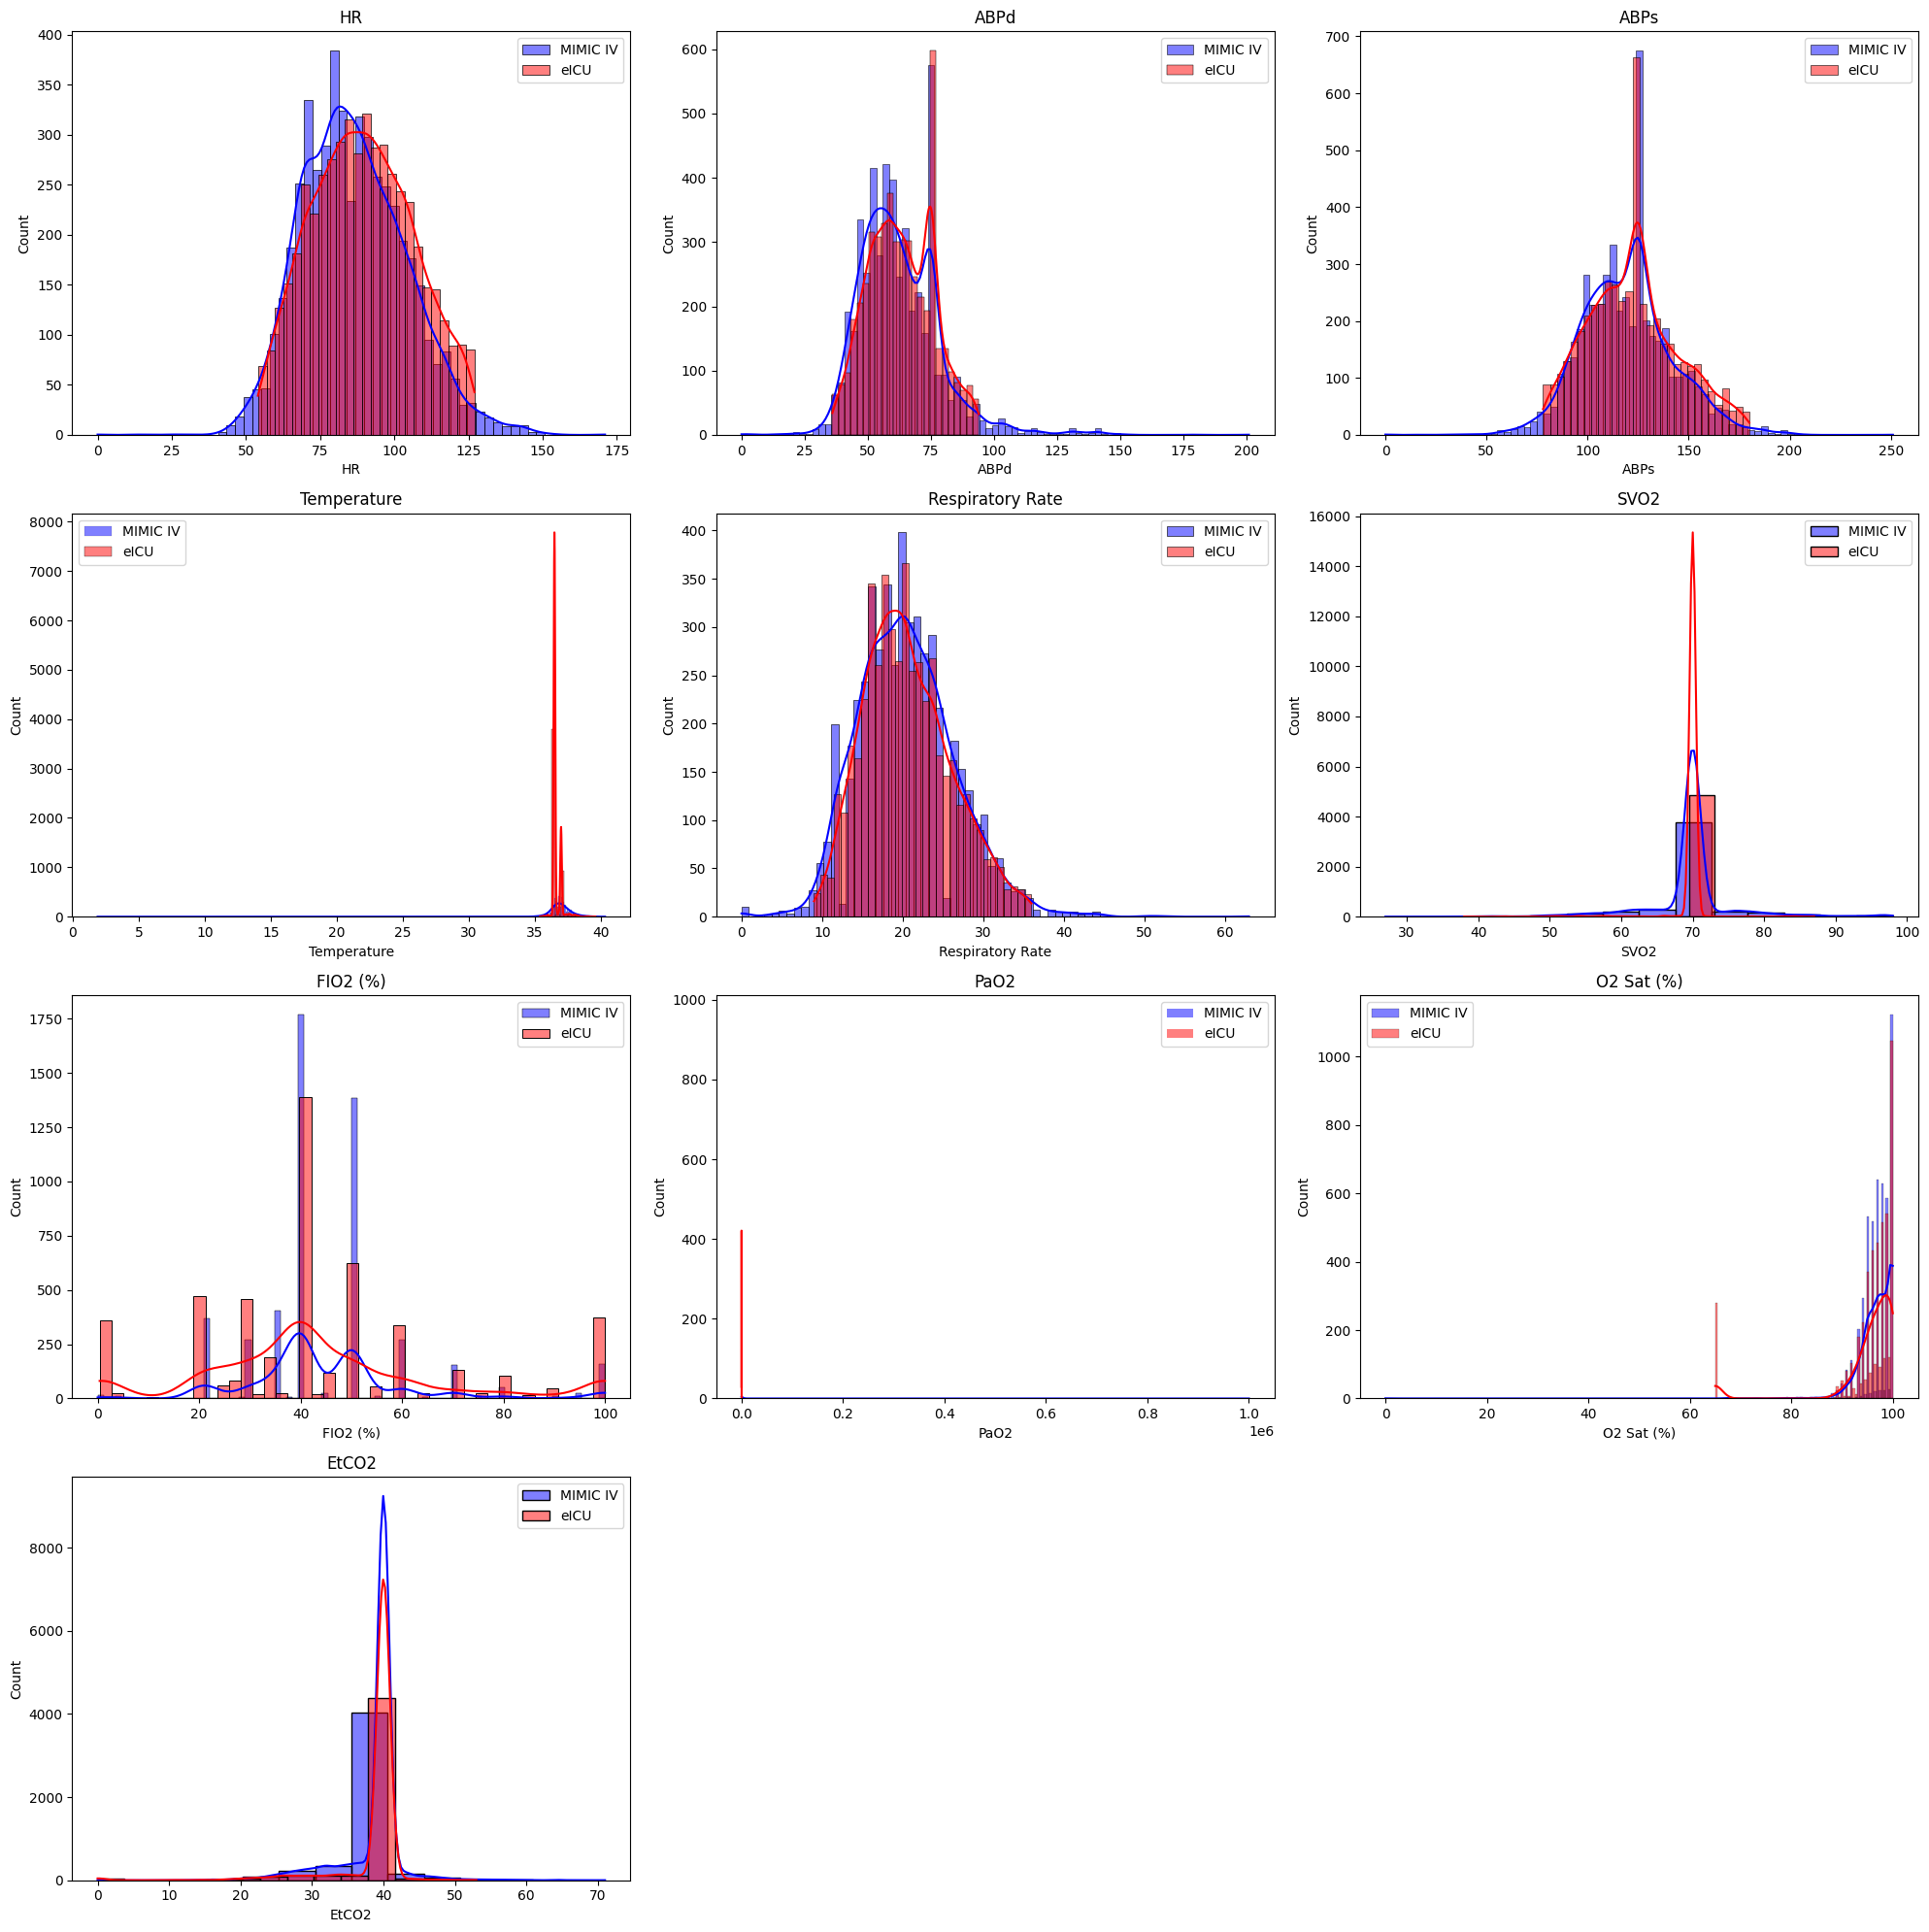

In [6]:
# 데이터 샘플링
sample_size = 5000  # 샘플링할 데이터 크기
mimic_sample = mimic.sample(n=sample_size)
eicu_sample = eicu.sample(n=sample_size)

# 시각화
plt.figure(figsize=(20, 20))

# 각 변수에 대해 subplot 생성 및 시각화
for i, col in enumerate(vital):
    plt.subplot(4, 3, i+1)  # 4행 4열로 서브플롯 배치
    sns.histplot(mimic_sample[col], kde=True, color='blue', label='MIMIC IV', alpha=0.5)
    sns.histplot(eicu_sample[col], kde=True, color='red', label='eICU', alpha=0.5)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

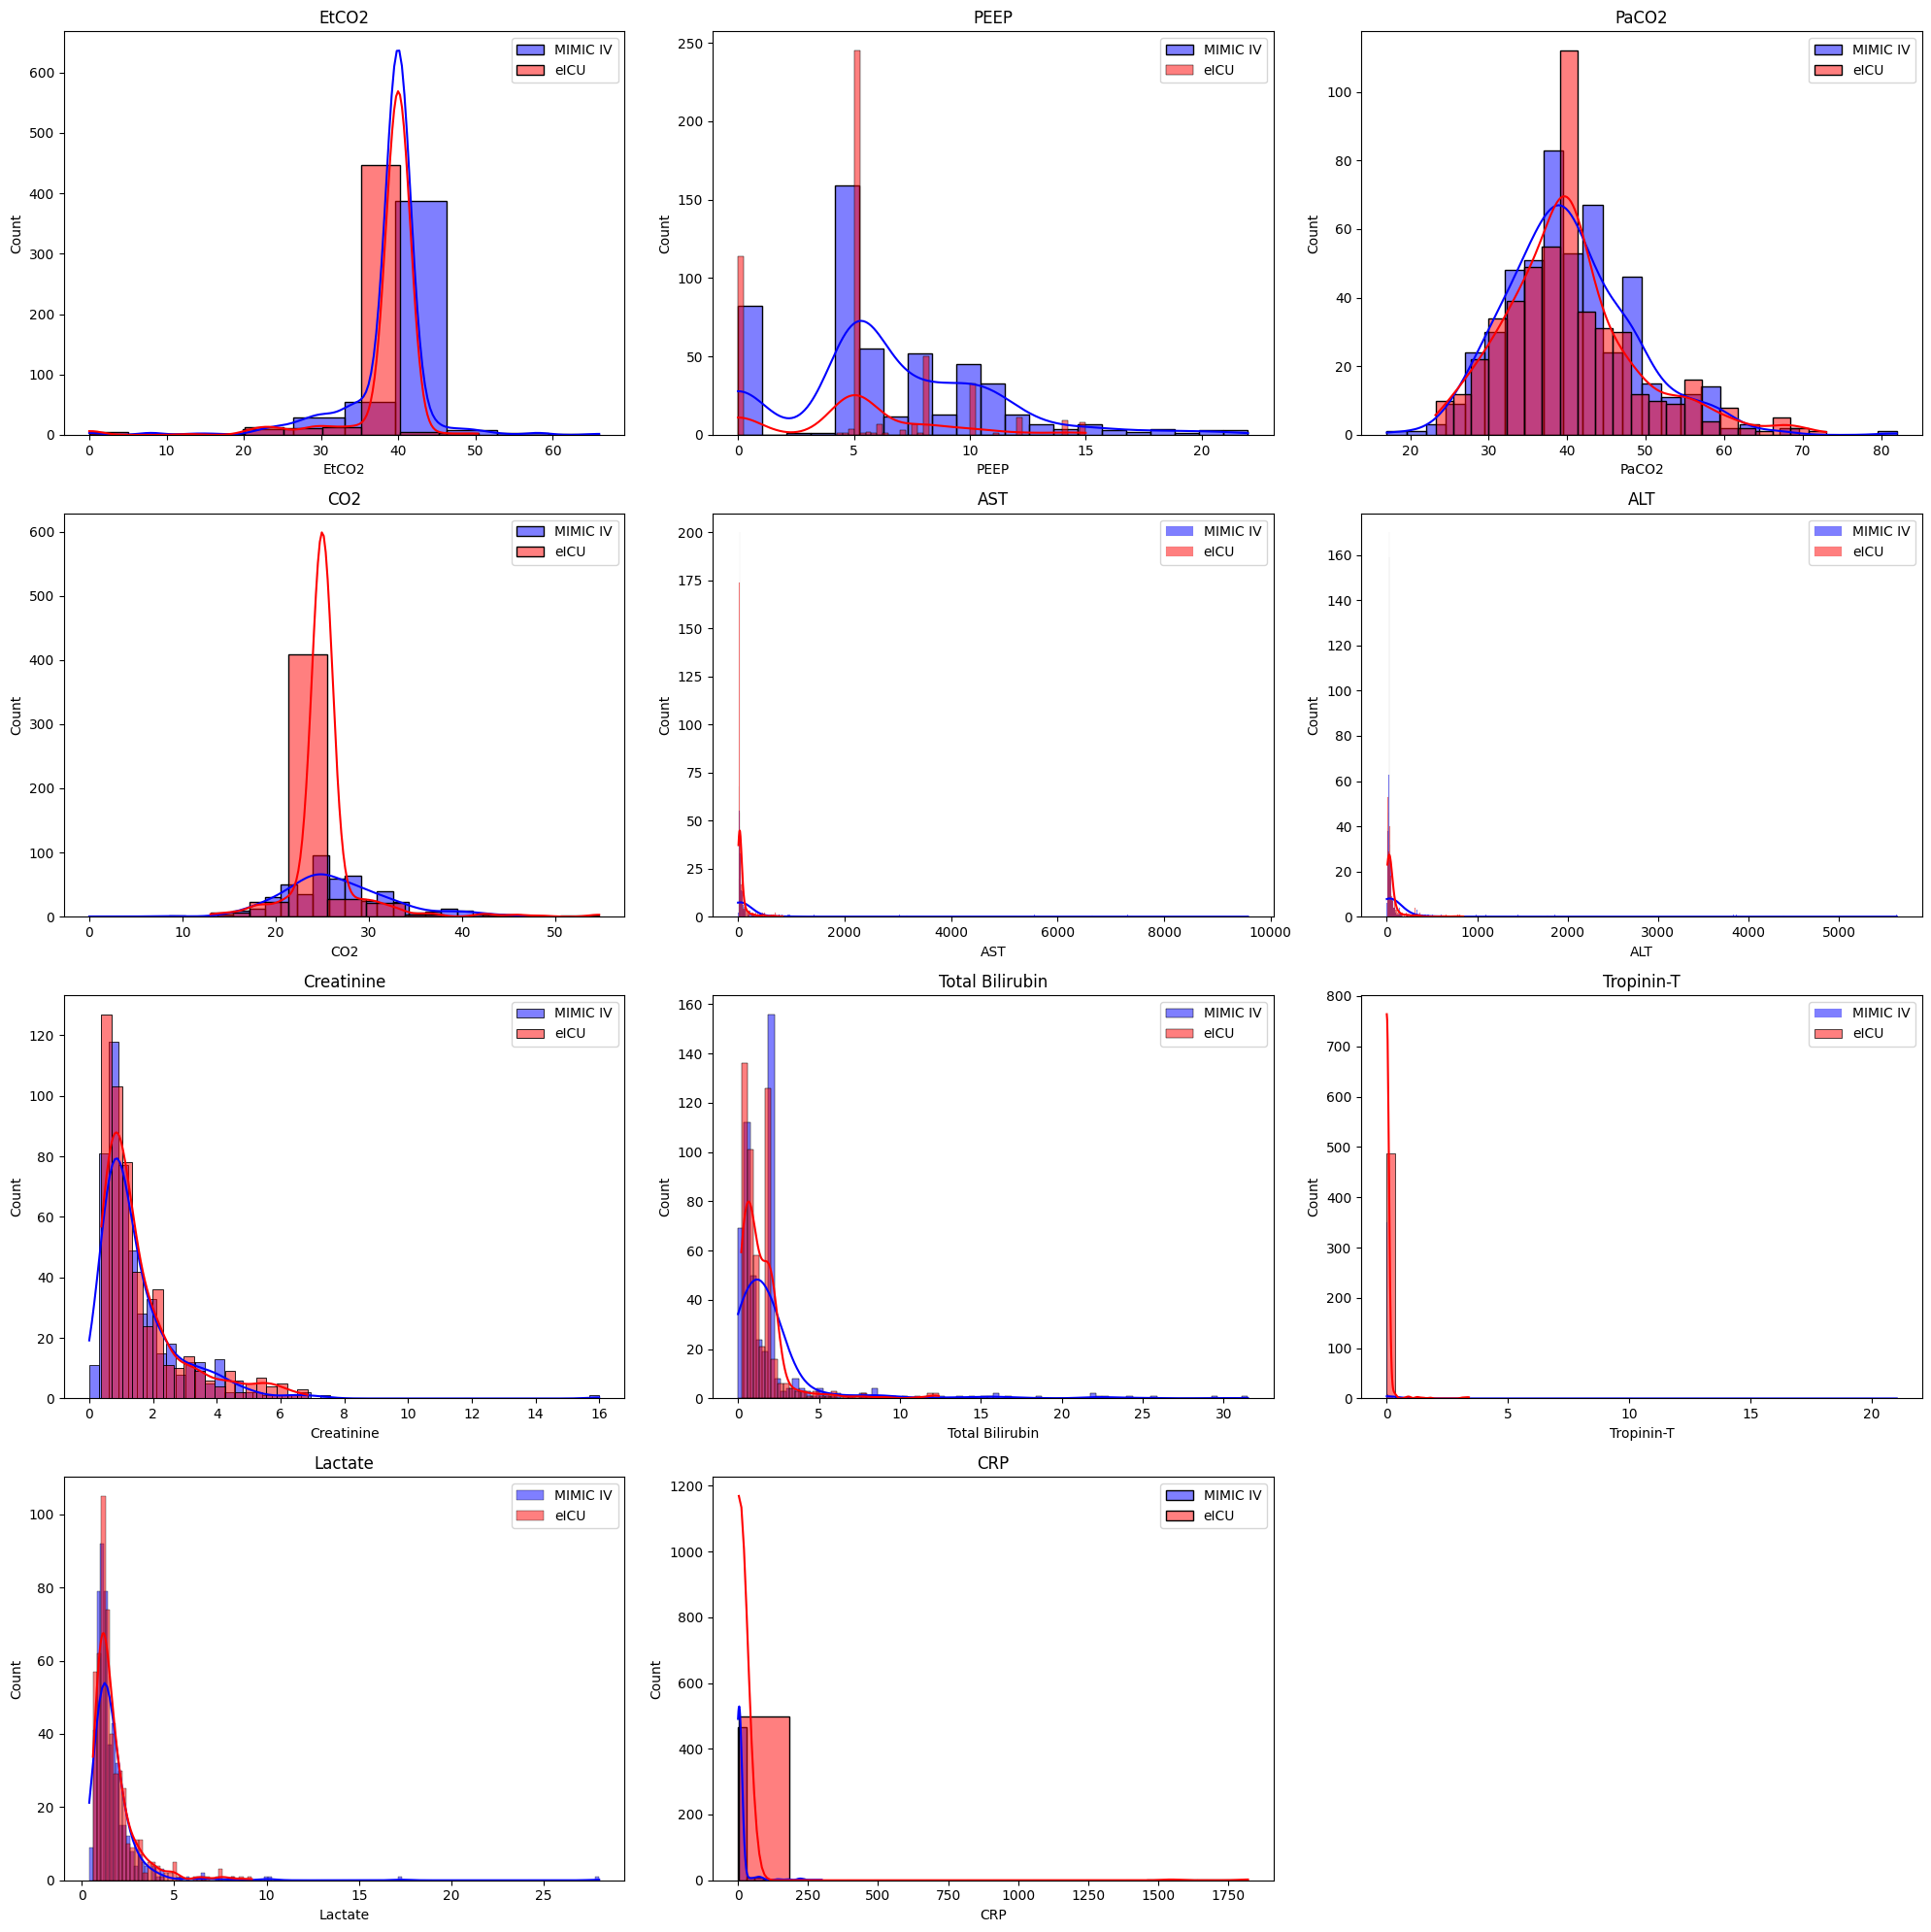

In [8]:
# 데이터 샘플링
sample_size = 500  # 샘플링할 데이터 크기
mimic_sample = mimic.sample(n=sample_size)
eicu_sample = eicu.sample(n=sample_size)
# 시각화
plt.figure(figsize=(20, 20))
# 각 변수에 대해 subplot 생성 및 시각화
for i, col in enumerate(lab):
    plt.subplot(4, 3, i+1)  # 4행 4열로 서브플롯 배치
    sns.histplot(mimic_sample[col], kde=True, color='blue', label='MIMIC IV', alpha=0.5)
    sns.histplot(eicu_sample[col], kde=True, color='red', label='eICU', alpha=0.5)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

In [12]:
target = ['Annotation','Shock_next_12h']
procedure = ['CXR', 'Ventilator', 'Mechanical_circ_support', 'MRI']
diagnosis = ['Adv__Valvular_HD', 'hypovolemia_internal', 'hypovolemia_external', 'Acute_Myocardial_Infarction', 'suspected_infection', 'spinal_cord_injury', 'Myocarditis']

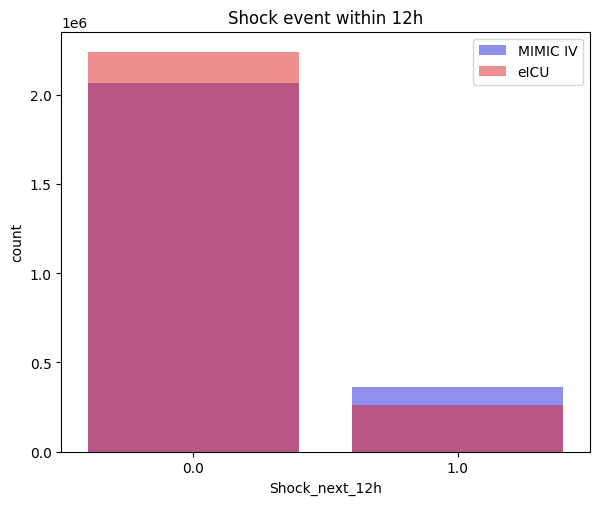

In [15]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 4)
sns.countplot(x='Shock_next_12h', data=mimic, label='MIMIC IV', color='blue', alpha=0.5)
sns.countplot(x='Shock_next_12h', data=eicu, label='eICU', color='red', alpha=0.5)
plt.title('Shock event within 12h')
plt.legend()

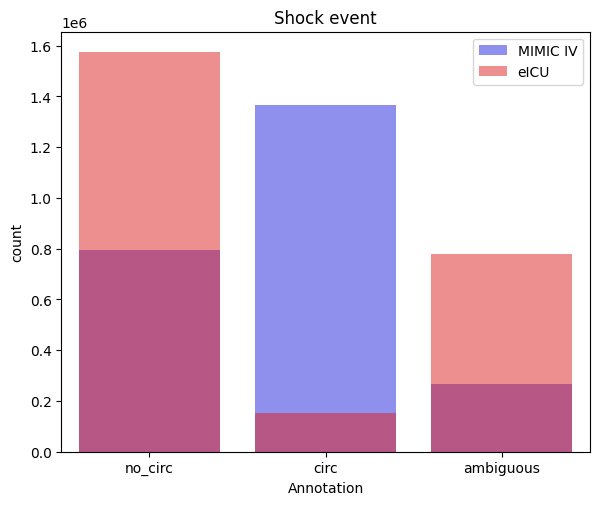

In [16]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 4)
sns.countplot(x='Annotation', data=mimic, label='MIMIC IV', color='blue', alpha=0.5)
sns.countplot(x='Annotation', data=eicu, label='eICU', color='red', alpha=0.5)
plt.title('Shock event')
plt.legend()

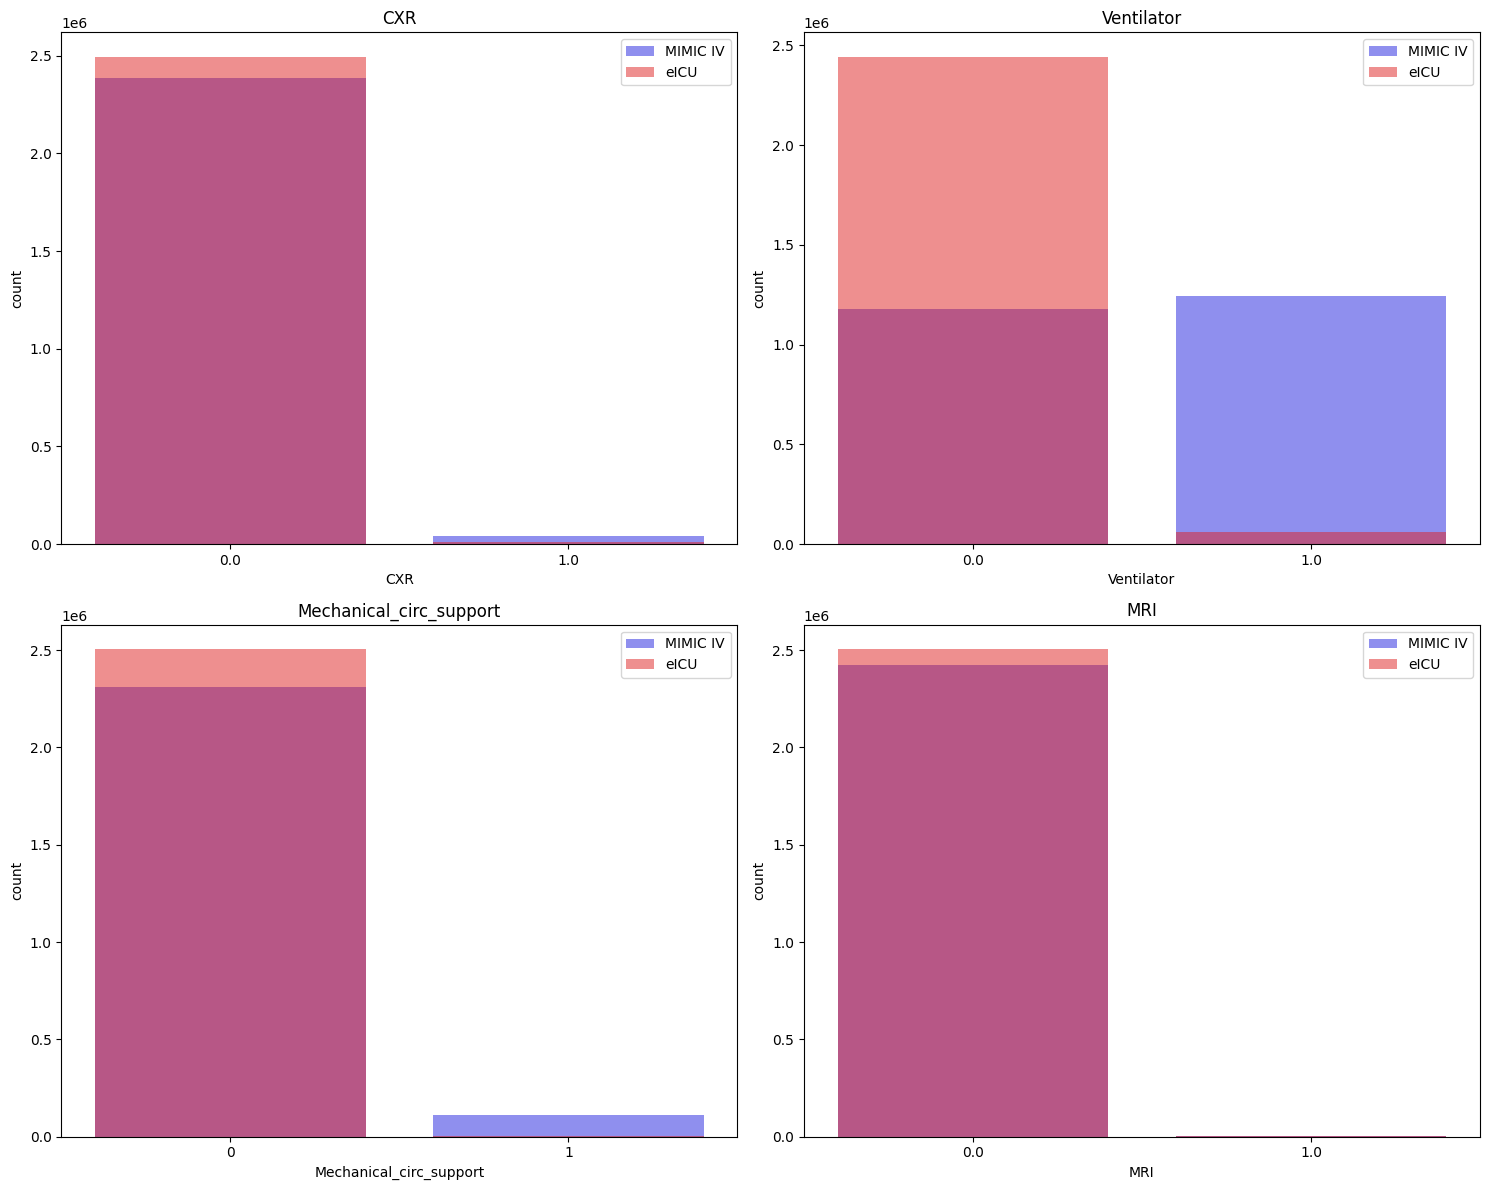

In [13]:
# 플롯 생성
plt.figure(figsize=(15, 12))

for i, proc in enumerate(procedure):
    plt.subplot(2, 2, i + 1)  # 3행 3열의 서브플롯 배치
    sns.countplot(x=proc, data=mimic, label='MIMIC IV', color='blue', alpha=0.5)
    sns.countplot(x=proc, data=eicu, label='eICU', color='red', alpha=0.5)
    plt.title(proc)
    plt.legend()

plt.tight_layout()
plt.show()

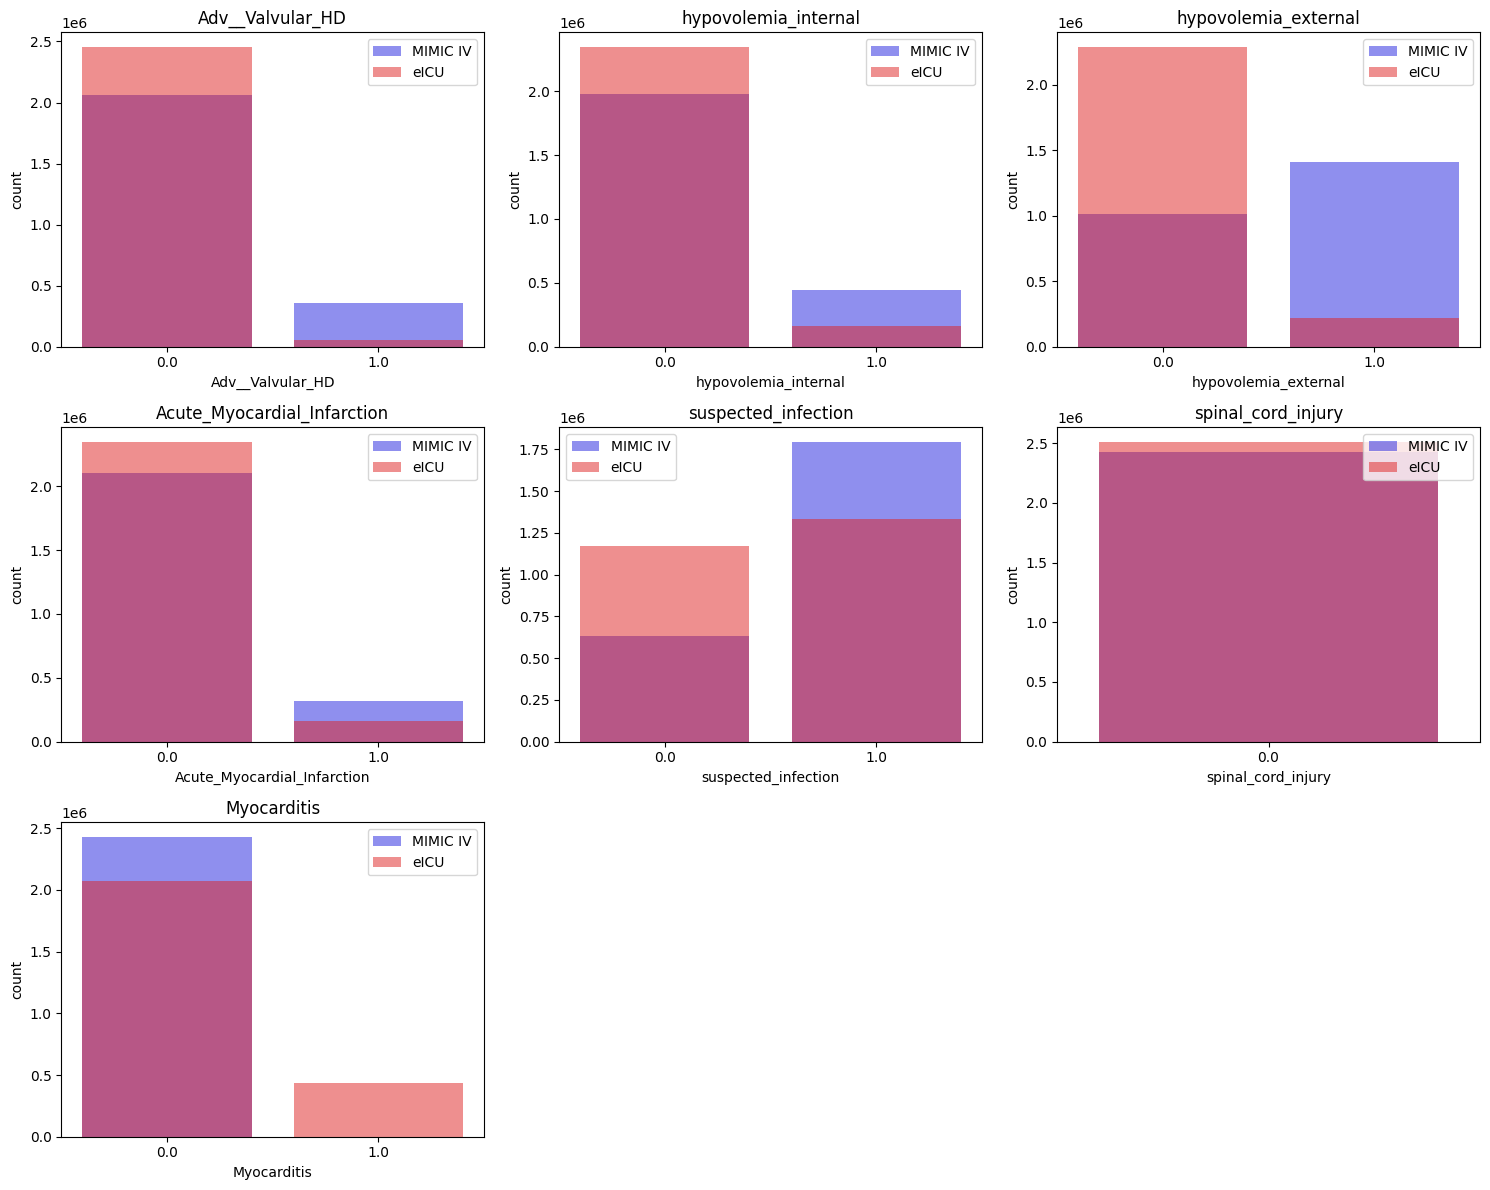

In [11]:
# 플롯 생성
plt.figure(figsize=(15, 12))

for i, diag in enumerate(diagnosis):
    plt.subplot(3, 3, i + 1)  # 3행 3열의 서브플롯 배치
    sns.countplot(x=diag, data=mimic, label='MIMIC IV', color='blue', alpha=0.5)
    sns.countplot(x=diag, data=eicu, label='eICU', color='red', alpha=0.5)
    plt.title(diag)
    plt.legend()

plt.tight_layout()
plt.show()